# Concrete Compressive Strength Data Set


_Use this notebook to practice your exploratory data analysis and visualization skills._

<div class="alert alert-block alert-success"  style="display:inline-block;" markdown="1">

**EXPLORE:** Click on the <kbd> Edit App </kbd> button in the top right corner of this page, to interact with this Jupyter notebook
<br><br>
To navigate through **this notebook** simply press the <kbd>shift</kbd> + <kbd>Enter</kbd> keys to run each **block of code**. 

You can include new blocks of code or text throughout the notebook to continue exploring and programming with R. 
</div>

(New to Jupyter notebooks? See the [help page](https://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) for more on working with Jupyter notebooks)

<div class="alert alert-block alert-warning" style="display:inline-block;" markdown="1">

**Original dataset** can be found at: https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

Version of the data used in this notebook is also available in [this repo](https://github.com/reisanar/datasets/blob/master/concrete.csv).
</div>

## Load packages

In [1]:
# use data science tools from the tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Read the data

Concrete is the most important material in **civil engineering**. The concrete compressive strength is a highly nonlinear function of _age_ and _ingredients_.

The dataset used in this notebook is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php), and it contains 1030 observations with 9 different attributes 9 (8 quantitative input variables, and 1 quantitative output variable). A data dictionary is included below: 


Variable                      |    Notes                
------------------------------|-------------------------------------------
Cement                        | kg in a $m^3$ mixture             
Blast Furnace Slag            | kg in a $m^3$ mixture  
Fly Ash                       | kg in a $m^3$ mixture             
Water                         | kg in a $m^3$ mixture              
Superplasticizer              | kg in a $m^3$ mixture
Coarse Aggregate              | kg in a $m^3$ mixture
Fine Aggregate                | kg in a $m^3$ mixture      
Age                           | in days                                             
Concrete compressive strength | MPa, megapascals


Below we read the `.csv` file using `readr::read_csv()` (the `readr` package is part of the `tidyverse`)

In [2]:
concrete <- read_csv("../data/concrete.csv", col_types = cols())

We can use the `summary()` function to get basic summary statistics on the different attributes of this dataset.

In [3]:
summary(concrete)

     Cement      Blast_Furnace_Slag    Fly_Ash           Water      
 Min.   :102.0   Min.   :  0.0      Min.   :  0.00   Min.   :121.8  
 1st Qu.:192.4   1st Qu.:  0.0      1st Qu.:  0.00   1st Qu.:164.9  
 Median :272.9   Median : 22.0      Median :  0.00   Median :185.0  
 Mean   :281.2   Mean   : 73.9      Mean   : 54.19   Mean   :181.6  
 3rd Qu.:350.0   3rd Qu.:142.9      3rd Qu.:118.27   3rd Qu.:192.0  
 Max.   :540.0   Max.   :359.4      Max.   :200.10   Max.   :247.0  
 Superplasticizer Coarse_Aggregate Fine_Aggregate       Age        
 Min.   : 0.000   Min.   : 801.0   Min.   :594.0   Min.   :  1.00  
 1st Qu.: 0.000   1st Qu.: 932.0   1st Qu.:731.0   1st Qu.:  7.00  
 Median : 6.350   Median : 968.0   Median :779.5   Median : 28.00  
 Mean   : 6.203   Mean   : 972.9   Mean   :773.6   Mean   : 45.66  
 3rd Qu.:10.160   3rd Qu.:1029.4   3rd Qu.:824.0   3rd Qu.: 56.00  
 Max.   :32.200   Max.   :1145.0   Max.   :992.6   Max.   :365.00  
 Concrete_compressive_strength
 Min.   : 

In [4]:
# number of rows in dataset
paste(nrow(concrete), " rows" )
# number of columns in dataset
paste(ncol(concrete), " columns" )
# alternatively, use the dim() function
dim(concrete)

[1] "1030  rows"

[1] "9  columns"

[1] 1030    9

## Distribution of continuous variables

Let us use data visualization to explore the **distribution** of some of the variables available here. We can start by using _histograms_ to check the distribution of continuous variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


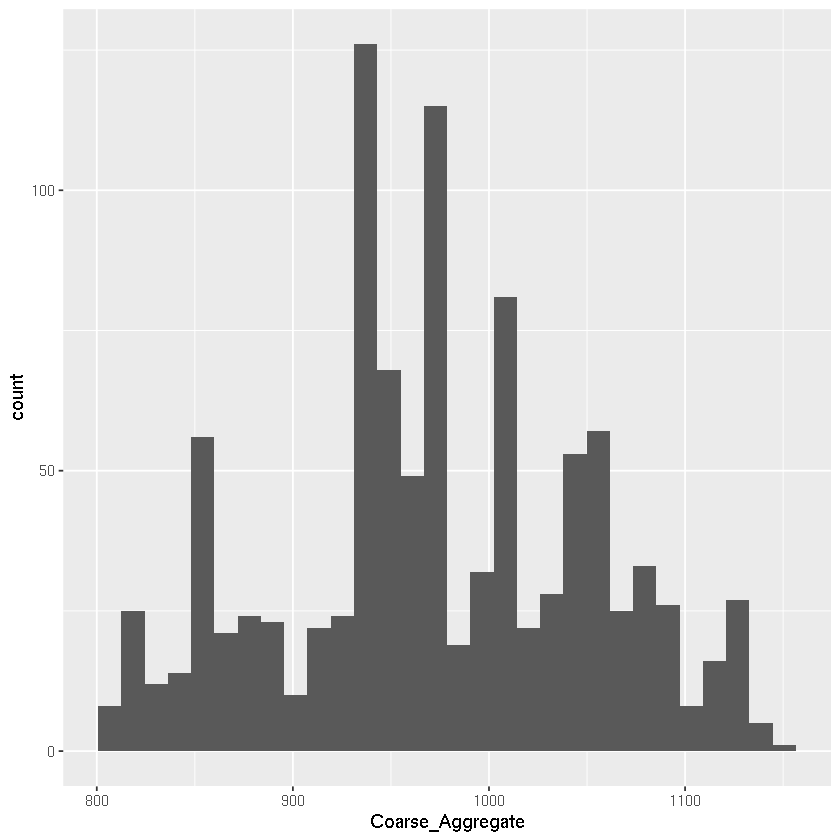

In [5]:
ggplot(data = concrete) + 
  geom_histogram(aes(x = Coarse_Aggregate))

<div class="alert alert-block alert-warning" style="display:inline-block;" markdown="1">

**Practice**: create a histogram for one of the other variables (e.g., study the distribution of `Concrete_compressive_strength`)

</div>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


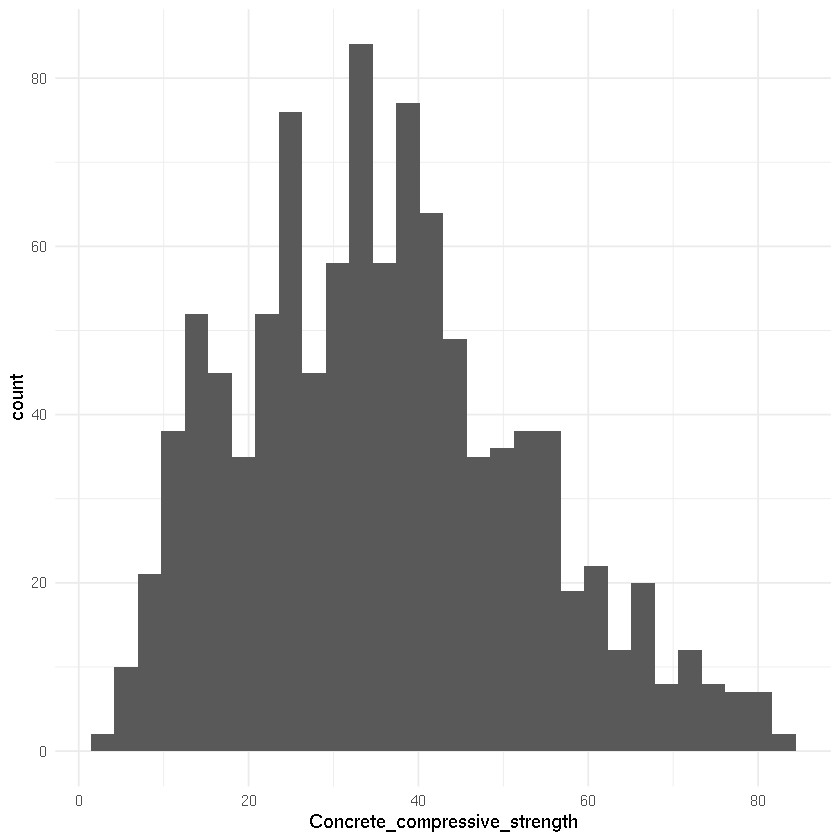

In [6]:
ggplot(data = concrete) + 
  geom_histogram(aes(x = Concrete_compressive_strength)) + 
  theme_minimal()

You can also create density plots for continous variables. Below we show the distribution of two other variables by creating a density plot (notice that in this case we also use the pipe `%>%` in conjunction with `dplyr::mutate()` to create a new variable: `strength_range`:

Warning message:
“Groups with fewer than two data points have been dropped.”Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”

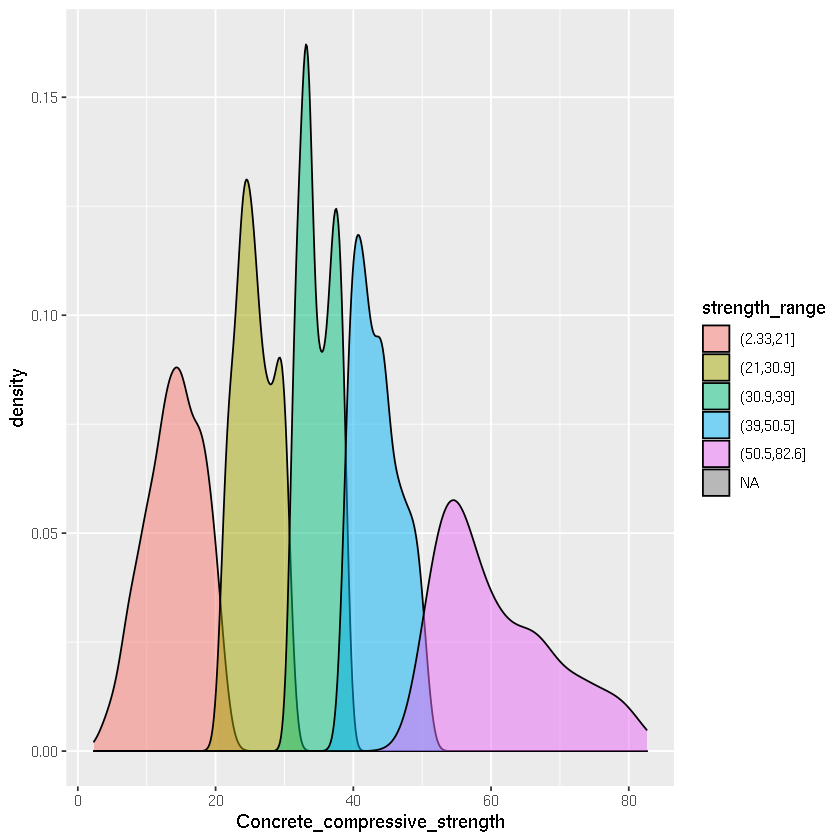

In [7]:
concrete %>%
  mutate(strength_range = cut(Concrete_compressive_strength, 
                              breaks = quantile(Concrete_compressive_strength, 
                                                probs = seq(0, 1, 0.2))) ) %>%
  ggplot() + 
  geom_density(aes(x = Concrete_compressive_strength, fill = strength_range), alpha = 0.5)

In [8]:
# get more information about the cut() function by typing ?cut (uncomment line below if needed)
#?cut

Notice that the variable `strength_range` that we created above for visualization purposes was not added yet to the dataset. We could store this variable as a new column, to continue using it in our analysis. 

In [9]:
new_concrete <- concrete %>%
  mutate(strength_range = cut(Concrete_compressive_strength, 
                              breaks = quantile(Concrete_compressive_strength, 
                                                probs = seq(0, 1, 0.2))) )

We can also create **boxplots** to check the distribution of a continouus variable. Below we show an example:

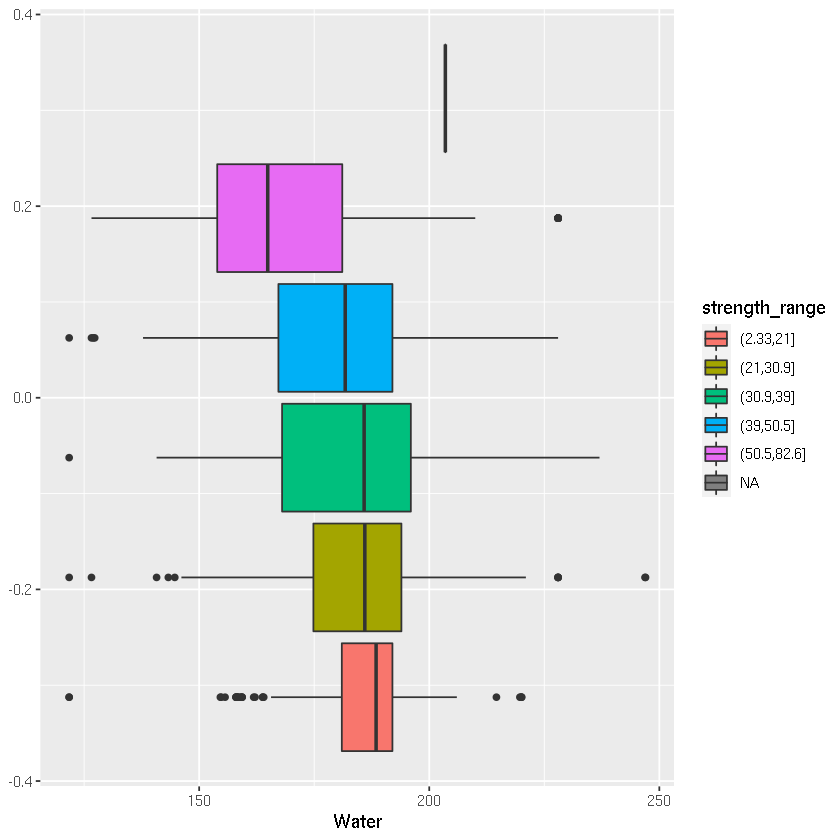

In [10]:
ggplot(data = new_concrete) + 
   geom_boxplot(aes(x = Water, fill = strength_range))

Let us use a _temporal_ indicator such as the one available in the variable `Age` (measured in days). We use the function `factor()` here to encode each day in a discrete way, and pay special attention to the labels by using the layer `labs()` in our plot.

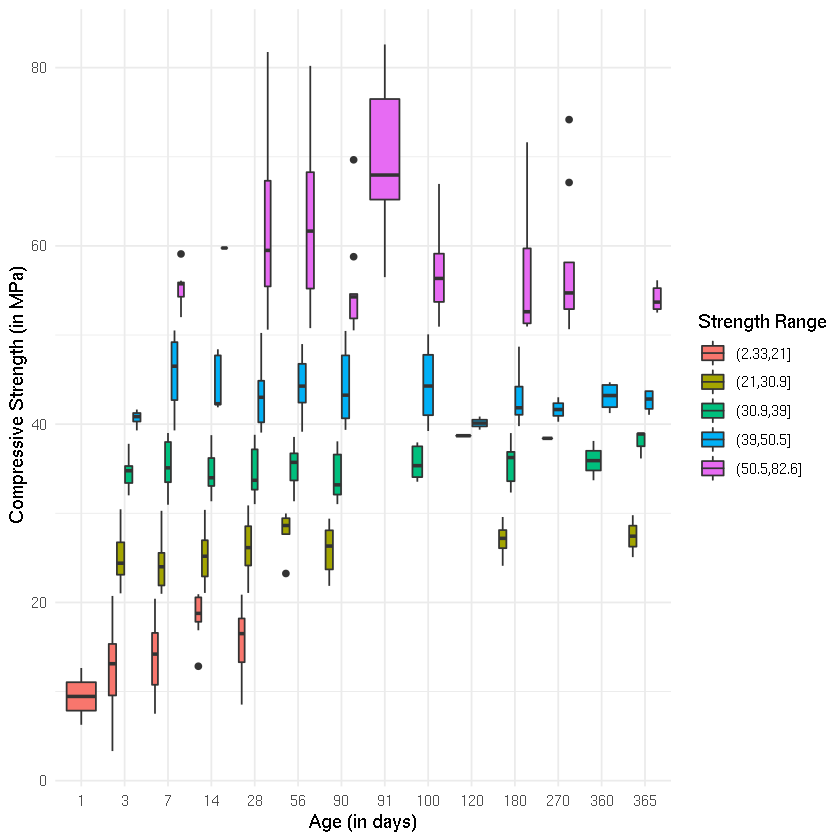

In [11]:
new_concrete %>% 
   filter(!is.na(strength_range)) %>% 
   ggplot() + 
   geom_boxplot(aes(x = factor(Age), y = Concrete_compressive_strength, fill = strength_range)) + 
   labs(x = "Age (in days)", y = " Compressive Strength (in MPa)", fill = "Strength Range") + 
   theme_minimal()

**Notes:** 
- The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).
- One could use the available attributes to solve a **regression problem** in which we try to estimate the concrete compressive strength based on the different variables.

## Covariation

Analyze the relationship between two continuous variables by creating a **scatterplot**

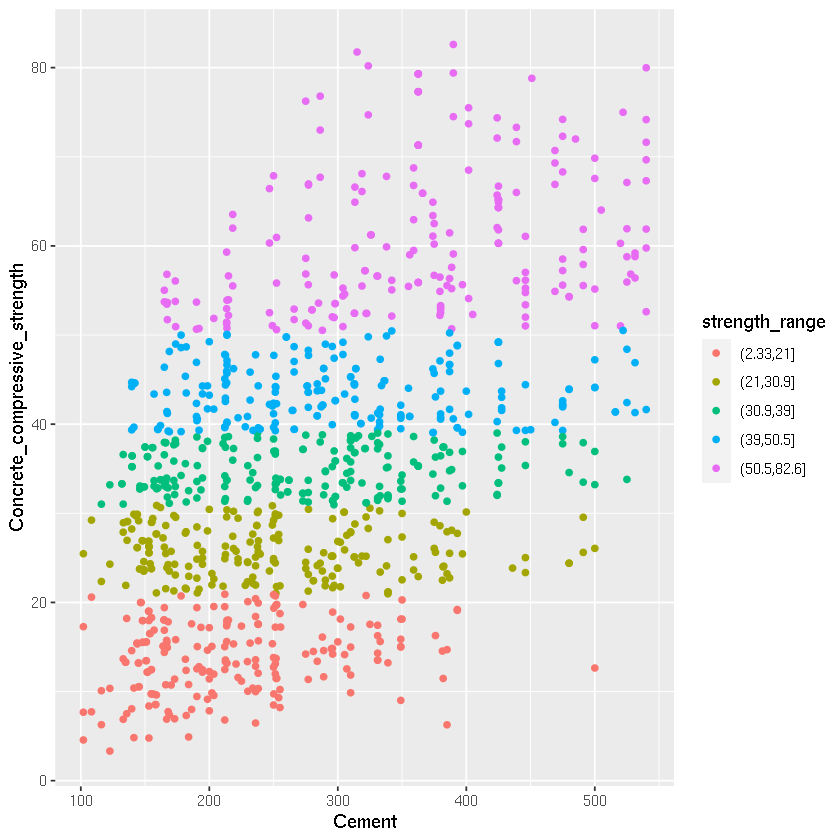

In [12]:
new_concrete %>%
  filter(!is.na(strength_range)) %>%
  ggplot() + 
  geom_point(aes(x = Cement, y = Concrete_compressive_strength, color = strength_range))

Let us create another scatterplot involving more variables and making use of the idea behind _**"mapping data to aesthetics"**_

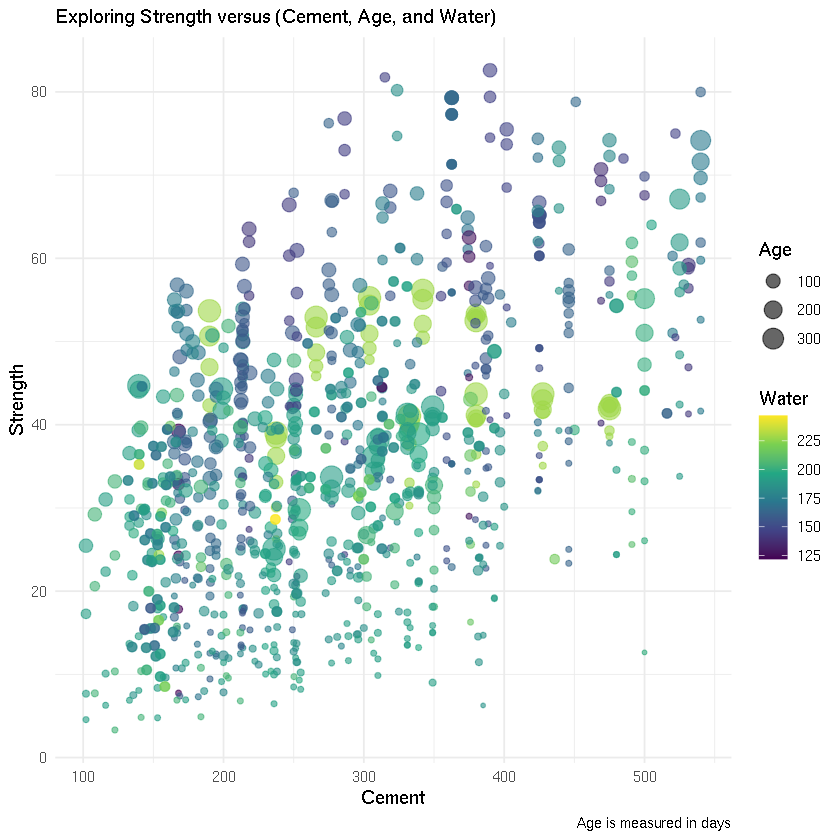

In [13]:
new_concrete %>%
  filter(!is.na(strength_range)) %>%
  ggplot() + 
  geom_point(aes(x = Cement, y = Concrete_compressive_strength, 
                 color = Water, size = Age), alpha = 0.6) + 
  scale_color_viridis_c() + 
  theme_minimal() + 
  labs(title = "Exploring Strength versus (Cement, Age, and Water)", 
       x = "Cement", y = "Strength", caption = "Age is measured in days")

Some things to notice from the plot above: 
- Compressive strength increases with amount of cement. Similar relationship with age.
- Cement with low age requires more cement for higher strength.
- Concrete strength increases when less water is used.

<div class="alert alert-block alert-warning" style="display:inline-block;" markdown="1">

**Practice**: explore the relationship between other variables. Can you characterize the trends you observe? Do they make sense?

</div>

<div class="alert alert-block alert-success" markdown="1">

**Success!** You can now return to the main page to continue learning.

</div>

### Some references

- Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

- Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998).

- Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks," J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999).

- Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic Engineering, Vol. 15, No. 4, pp. 659-663 (2003).

- Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No. 1, pp. 77-84 (2003).

- Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and neural networks,": Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4, pp.597-604 (2006).